In [1]:
import numpy as np
import os
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_folders_directory = 'drive/MyDrive/Colab Notebooks/Eyelid_Closure_Images/TRAIN/'
test_folders_directory = 'drive/MyDrive/Colab Notebooks/Eyelid_Closure_Images/TEST'
import os
print(os.listdir(test_folders_directory))

['TEST']


In [3]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=7
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_folders_directory,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=7
)
test_generator = test_datagen.flow_from_directory(
    directory=test_folders_directory,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 3548 images belonging to 2 classes.
Found 887 images belonging to 2 classes.
Found 311 images belonging to 1 classes.


In [4]:
def LeNet5():
  LeNet5 = Sequential()
  LeNet5.add(Conv2D(6, (5, 5), activation="relu", input_shape=(32,32,1)))
  LeNet5.add(MaxPooling2D(2, 2))
  LeNet5.add(Conv2D(16, (5, 5), activation="relu"))
  LeNet5.add(MaxPooling2D(2, 2))
  LeNet5.add(Flatten())
  LeNet5.add(Dense(120, activation="relu"))
  LeNet5.add(Dropout(0.25))
  LeNet5.add(Dense(84, activation="relu"))
  LeNet5.add(Dropout(0.25))
  LeNet5.add(Dense(2, activation="softmax"))
  LeNet5.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
  return LeNet5

def AlexNet():
  AlexNet = Sequential()
  AlexNet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
  AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
  AlexNet.add(Flatten())
  AlexNet.add(Dense(4096, activation='relu'))
  AlexNet.add(Dropout(0.5))
  AlexNet.add(Dense(4096, activation='relu'))
  AlexNet.add(Dropout(0.5))
  AlexNet.add(Dense(2, activation='softmax'))
  AlexNet.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
  return AlexNet

def vgg16():
  vgg16 = Sequential()
  vgg16.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  vgg16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
  vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
  vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
  vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  vgg16.add(Flatten())
  vgg16.add(Dense(4096,"relu"))
  vgg16.add(Dense(4096,"relu"))
  vgg16.add(Dense(2, "sigmoid"))
  vgg16.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
  return vgg16

In [5]:
LeNet5_model = LeNet5()
LeNet5_history = LeNet5_model.fit(train_generator, epochs=50, validation_data=valid_generator, shuffle=True, validation_steps=len(valid_generator))

Epoch 1/50
28/28 [==============================] - 1403s 50s/step - loss: 0.4973 - accuracy: 0.8103 - val_loss: 0.4067 - val_accuracy: 0.8410
Epoch 2/50
28/28 [==============================] - 11s 398ms/step - loss: 0.2310 - accuracy: 0.9177 - val_loss: 0.4232 - val_accuracy: 0.8489
Epoch 3/50
28/28 [==============================] - 11s 393ms/step - loss: 0.1481 - accuracy: 0.9538 - val_loss: 0.5952 - val_accuracy: 0.8309
Epoch 4/50
28/28 [==============================] - 11s 394ms/step - loss: 0.1430 - accuracy: 0.9563 - val_loss: 0.5044 - val_accuracy: 0.8512
Epoch 5/50
28/28 [==============================] - 11s 395ms/step - loss: 0.1176 - accuracy: 0.9594 - val_loss: 0.5548 - val_accuracy: 0.8512
Epoch 6/50
28/28 [==============================] - 13s 461ms/step - loss: 0.1106 - accuracy: 0.9653 - val_loss: 0.4728 - val_accuracy: 0.8478
Epoch 7/50
28/28 [==============================] - 12s 449ms/step - loss: 0.0936 - accuracy: 0.9687 - val_loss: 0.4938 - val_accuracy: 0.8625

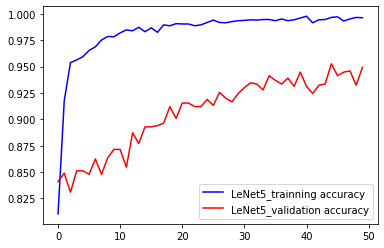

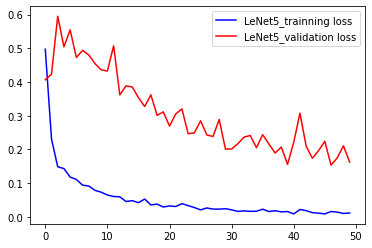

In [6]:
LeNet5_accuracy = LeNet5_history.history['accuracy']
LeNet5_val_accuracy = LeNet5_history.history['val_accuracy']
LeNet5_loss = LeNet5_history.history['loss']
LeNet5_val_loss = LeNet5_history.history['val_loss']
LeNet5_epochs = range(50)

plt.plot(LeNet5_epochs, LeNet5_accuracy, "b", label="LeNet5_trainning accuracy")
plt.plot(LeNet5_epochs, LeNet5_val_accuracy, "r", label="LeNet5_validation accuracy")
plt.legend()
plt.show()

plt.plot(LeNet5_epochs, LeNet5_loss, "b", label="LeNet5_trainning loss")
plt.plot(LeNet5_epochs, LeNet5_val_loss, "r", label="LeNet5_validation loss")
plt.legend()
plt.show()